In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import os

import random

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data.sampler import SubsetRandomSampler

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [37]:
# Paths
training_data_path = "2D_FNN_results/larger_dataset(interpolated)/FNN_trainingData_Gadi.txt"
testing_data1_path = "2D_FNN_results/larger_dataset(interpolated)/FNN_testingData_Gadi_1.txt"
testing_data2_path = "2D_FNN_results/larger_dataset(interpolated)/FNN_testingData_Gadi_2.txt"

testing_best_evolution_path = "2D_FNN_results/larger_dataset(interpolated)/FNN_best_evolution.npy"
testing_worst_evolution_path = "2D_FNN_results/larger_dataset(interpolated)/FNN_worst_evolution.npy"

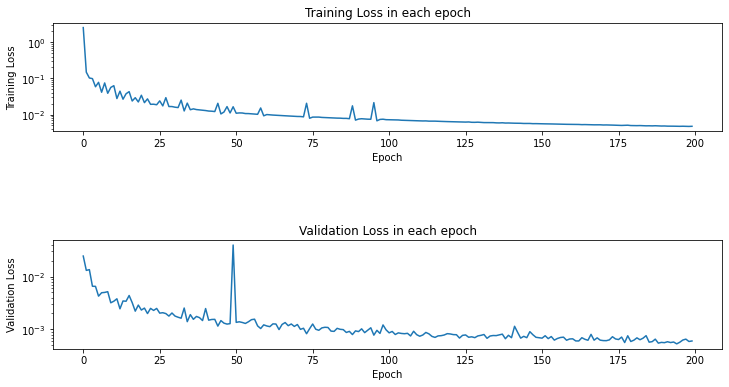

In [38]:
file1 = open(training_data_path, 'r')
Lines = file1.readlines()

training_data_list = []
for line in Lines:
    training_data_list.append([float(x) for x in line.strip().split('/')])
    
# Plot the Training loss and validation loss during training
plt.figure(figsize=(12, 6))
    
plt.subplot(2, 1, 1)
plt.plot(training_data_list[0])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss in each epoch')
plt.yscale("log")

plt.subplot(2, 1, 2)
plt.plot(training_data_list[1])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss in each epoch')
plt.yscale("log")
    
plt.subplots_adjust(hspace=1)
    
plt.show()

In [39]:
file1 = open(testing_data1_path, 'r')
Lines = file1.readlines()

testing_data_list1 = []
for line in Lines:
    testing_data_list1.append(line)
    
print("Total loss for the model on test set is",testing_data_list1[0])
#print("Accuracy for the model on test set is", testing_data_list1[1])

Total loss for the model on test set is 0.0005368295314838178



In [40]:
file2 = open(testing_data2_path, 'r')
Lines = file2.readlines()

best_worst_error_list = [float(x) for x in Lines[0].strip().split('/')]
best_worst_output_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[1].strip().split('/')]
best_worst_ConvAE_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[2].strip().split('/')]
best_worst_predicted_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[3].strip().split('/')]

Best prediction has an error of  2.7897692689293763e-07


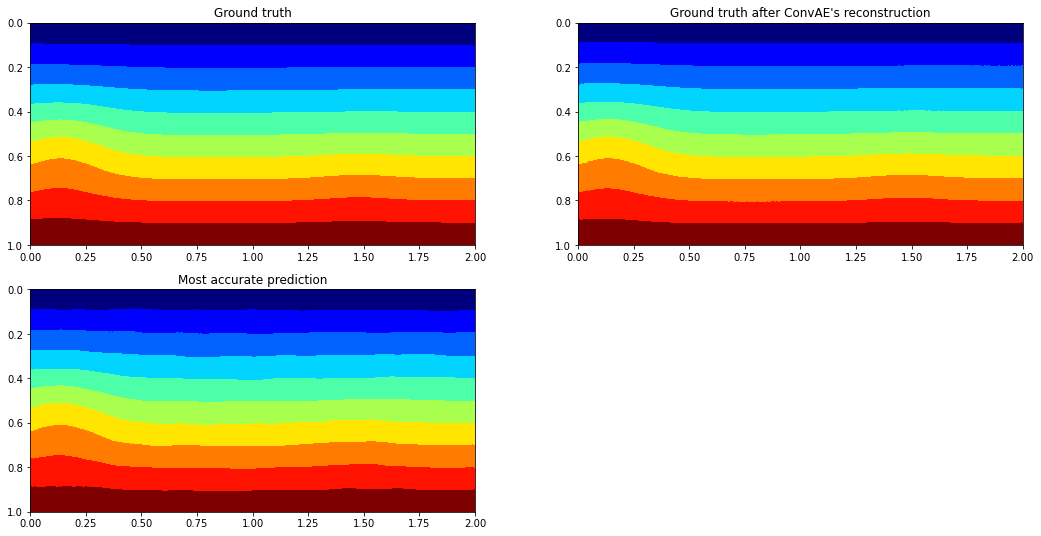

Worst prediction has an error of  1.2783743841282558e-05


In [41]:
# Draw some plots for the best and the worst error
print("Best prediction has an error of ", best_worst_error_list[0])
    
    
plt.figure(figsize=(18, 9))
    
plt.subplot(2,2,1)
plt.title("Ground truth")
plt.imshow(best_worst_output_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,2)
plt.title("Ground truth after ConvAE's reconstruction")
plt.imshow(best_worst_ConvAE_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,3)
plt.title("Most accurate prediction")
plt.imshow(best_worst_predicted_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
plt.show()
    
    
print("Worst prediction has an error of ", best_worst_error_list[1])
    
    
    
plt.figure(figsize=(18, 9))
    
plt.subplot(2,2,1)
plt.title("Ground truth")
plt.imshow(best_worst_output_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,2)
    
plt.title("Ground truth after ConvAE's reconstruction")
plt.imshow(best_worst_ConvAE_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,3)
    
plt.title("Least accurate prediction")
plt.imshow(best_worst_predicted_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
plt.show()

In [42]:
best_evolution = np.load(testing_best_evolution_path)
worst_evolution = np.load(testing_worst_evolution_path)

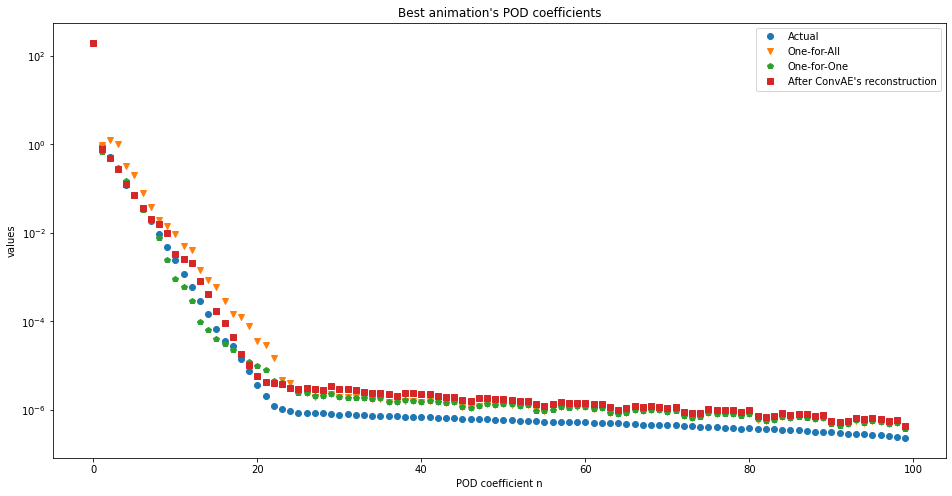

In [43]:
def SVD(X):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    return U, Sigma, VT

_, S_original_best, _ = SVD(np.transpose(np.asarray(best_evolution[0]),(1,2,0)))
_, S_predicted_best, _ = SVD(np.transpose(np.asarray(best_evolution[1]),(1,2,0)))
_, S_ConvAE_best, _ = SVD(np.transpose(np.asarray(best_evolution[2]),(1,2,0)))
_, S_single_best, _ = SVD(np.transpose(np.asarray(best_evolution[3]),(1,2,0)))

plt.figure(figsize=(16,8))
plt.title("Best animation's POD coefficients")
plt.plot(S_original_best.diagonal(),'o',label="Actual")
plt.plot(S_predicted_best.diagonal(),'v',label="One-for-All")
plt.plot(S_single_best.diagonal(),'p',label="One-for-One")
plt.plot(S_ConvAE_best.diagonal(),'s',label="After ConvAE's reconstruction")
plt.ylabel("values")
plt.xlabel("POD coefficient n")
plt.legend()
plt.yscale("log")
plt.show()

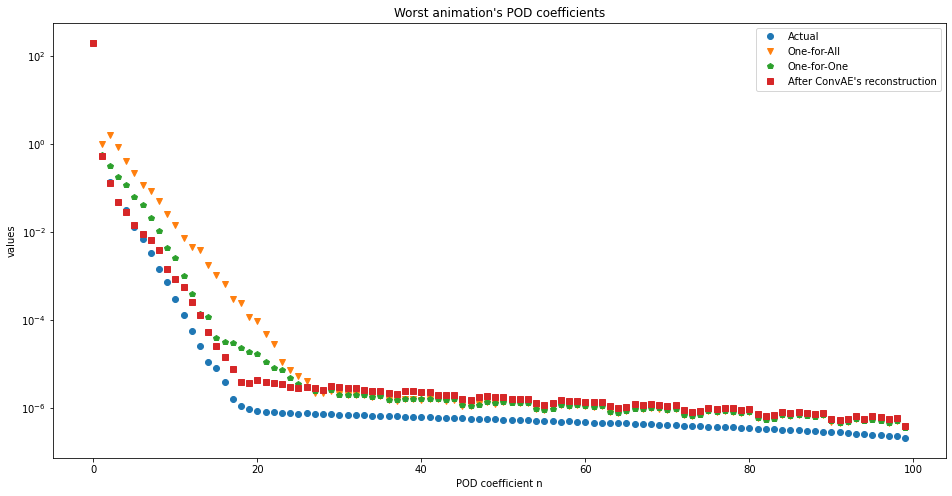

In [44]:
_, S_original_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[0]),(1,2,0)))
_, S_predicted_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[1]),(1,2,0)))
_, S_ConvAE_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[2]),(1,2,0)))
_, S_single_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[3]),(1,2,0)))

plt.figure(figsize=(16,8))
plt.title("Worst animation's POD coefficients")
plt.plot(S_original_worst.diagonal(),'o',label="Actual")
plt.plot(S_predicted_worst.diagonal(),'v',label="One-for-All")
plt.plot(S_single_worst.diagonal(),'p',label="One-for-One")
plt.plot(S_ConvAE_worst.diagonal(),'s',label="After ConvAE's reconstruction")
plt.ylabel("values")
plt.xlabel("POD coefficient n")
plt.legend()
plt.yscale("log")
plt.show()

In [10]:
'''
# Display animations for temperature fields in different timestamps
fig = plt.figure(figsize=(12, 12))

plt.subplot(3,1,1)
plt.title("Best Actual Temperature fields animation")
plot1= plt.imshow(best_evolution[0][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(3,1,2)
plt.title("Best Predicted Temperature fields animation")
plot2= plt.imshow(best_evolution[1][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(3,1,3)
plt.title("Best Single Predicted Temperature fields animation")
plot3= plt.imshow(best_evolution[3][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
def animate(i):
    plot1.set_data(best_evolution[0][i])
    plot2.set_data(best_evolution[1][i])
    plot3.set_data(best_evolution[3][i])
    return [plot1,plot2,plot3]

anim = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
anim.save('actual_and_Predictions_Best.gif')
plt.close()
HTML(anim.to_jshtml())
'''

'\n# Display animations for temperature fields in different timestamps\nfig = plt.figure(figsize=(12, 12))\n\nplt.subplot(3,1,1)\nplt.title("Best Actual Temperature fields animation")\nplot1= plt.imshow(best_evolution[0][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n\n\nplt.subplot(3,1,2)\nplt.title("Best Predicted Temperature fields animation")\nplot2= plt.imshow(best_evolution[1][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\n\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n\n\nplt.subplot(3,1,3)\nplt.title("Best Single Predicted Temperature fields animation")\nplot3= plt.imshow(best_evolution[3][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n    \ndef animate(i):\n    plot1.set_data(best_evolution[0][i])\n    plot2.set_data(best_evolution[1][i])

In [11]:
'''
# Display animations for temperature fields in different timestamps
fig = plt.figure(figsize=(12, 12))

plt.subplot(3,1,1)
plt.title("Worst Actual Temperature fields animation")
plot1= plt.imshow(worst_evolution[0][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(3,1,2)
plt.title("Worst Predicted Temperature fields animation")
plot2= plt.imshow(worst_evolution[1][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(3,1,3)
plt.title("Worst Single Predicted Temperature fields animation")
plot3= plt.imshow(worst_evolution[3][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
def animate(i):
    plot1.set_data(worst_evolution[0][i])
    plot2.set_data(worst_evolution[1][i])
    plot3.set_data(worst_evolution[3][i])
    return [plot1,plot2,plot3]

anim = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
anim.save('actual_and_Predictions_Worst.gif')
plt.close()
HTML(anim.to_jshtml())
'''

'\n# Display animations for temperature fields in different timestamps\nfig = plt.figure(figsize=(12, 12))\n\nplt.subplot(3,1,1)\nplt.title("Worst Actual Temperature fields animation")\nplot1= plt.imshow(worst_evolution[0][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n\n\nplt.subplot(3,1,2)\nplt.title("Worst Predicted Temperature fields animation")\nplot2= plt.imshow(worst_evolution[1][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\n\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n\n\nplt.subplot(3,1,3)\nplt.title("Worst Single Predicted Temperature fields animation")\nplot3= plt.imshow(worst_evolution[3][0],\n                 cmap=cm.get_cmap(\'jet\', 10),\n                 extent=(0, 2, 0, 1))\nax = plt.gca()\nax.set_ylim(ax.get_ylim()[::-1])\n    \ndef animate(i):\n    plot1.set_data(worst_evolution[0][i])\n    plot2.set_data(worst_evolutio

In [12]:
# Further Testing on FNN (Interpolated Dataset only)
POD_lists = np.load("2D_FNN_results/larger_dataset(interpolated)/FNN_testing_PCA_lists.npy")
POD_relative_lists = np.load("2D_FNN_results/larger_dataset(interpolated)/FNN_testing_PCA_relative_lists.npy")
loss_lists = np.load("2D_FNN_results/larger_dataset(interpolated)/FNN_testing_loss_lists.npy")

In [13]:
import pandas as pd

# Construct Data loss table
loss_array = [[sum([float(x) for x in S_result]), min([float(x) for x in S_result]), max([float(x) for x in S_result]), sum([float(x) for x in S_result])/len([float(x) for x in S_result]), np.std(np.asarray([float(x) for x in S_result]))] for S_result in loss_lists]

loss_df = pd.DataFrame(loss_array, columns = ['Sum','Min','Max','Average','Std'], index = ['S = 1', 'S = 2', 'S = 4', 'S = 8', 'S = 16', 'S = 99'])
loss_df

Sum         Min         Max     Average        Std
S = 1     9015.010050    5.823694   17.017189    9.983400   2.374120
S = 2    11329.417681    8.176126   19.792910   12.546420   2.356270
S = 4    16120.171083   12.773992   25.700108   17.851795   2.485913
S = 8    25905.884785   21.888235   40.224834   28.688687   3.147291
S = 16   46579.726814   40.507626   71.589645   51.583308   5.172216
S = 99  294664.897537  158.034134  616.643127  326.317716  65.739641

In [14]:
# Construct Data loss table
pod_array = [[sum([float(x) for x in S_result]), min([float(x) for x in S_result]), max([float(x) for x in S_result]), sum([float(x) for x in S_result])/len([float(x) for x in S_result]), np.std(np.asarray([float(x) for x in S_result]))] for S_result in POD_lists]

pod_df = pd.DataFrame(pod_array, columns = ['Sum','Min','Max','Average','Std'], index = ['S = 1', 'S = 2', 'S = 4', 'S = 8', 'S = 16', 'S = 99'])
pod_df

Sum       Min       Max   Average       Std
S = 1    289.640025  0.064551  2.094217  0.320753  0.281404
S = 2    317.987714  0.084184  2.087471  0.352146  0.273011
S = 4    366.481342  0.081007  2.064663  0.405849  0.263169
S = 8    457.649486  0.096688  1.984577  0.506810  0.255379
S = 16   623.888202  0.198056  2.133060  0.690906  0.254304
S = 99  1509.867974  0.305971  2.610881  1.672058  0.377087

In [15]:
# Construct Data loss table
pod_relative_array = [[sum([float(x) for x in S_result]), min([float(x) for x in S_result]), max([float(x) for x in S_result]), sum([float(x) for x in S_result])/len([float(x) for x in S_result]), np.std(np.asarray([float(x) for x in S_result]))] for S_result in POD_relative_lists]

pod_relative_df = pd.DataFrame(pod_relative_array, columns = ['Sum','Min','Max','Average','Std'], index = ['S = 1', 'S = 2', 'S = 4', 'S = 8', 'S = 16', 'S = 99'])
pod_relative_df

Sum       Min       Max   Average       Std
S = 1   1.446347  0.000322  0.010456  0.001602  0.001405
S = 2   1.587908  0.000420  0.010422  0.001758  0.001363
S = 4   1.830071  0.000405  0.010308  0.002027  0.001314
S = 8   2.285339  0.000483  0.009907  0.002531  0.001275
S = 16  3.115488  0.000989  0.010648  0.003450  0.001270
S = 99  7.539839  0.001528  0.013038  0.008350  0.001883

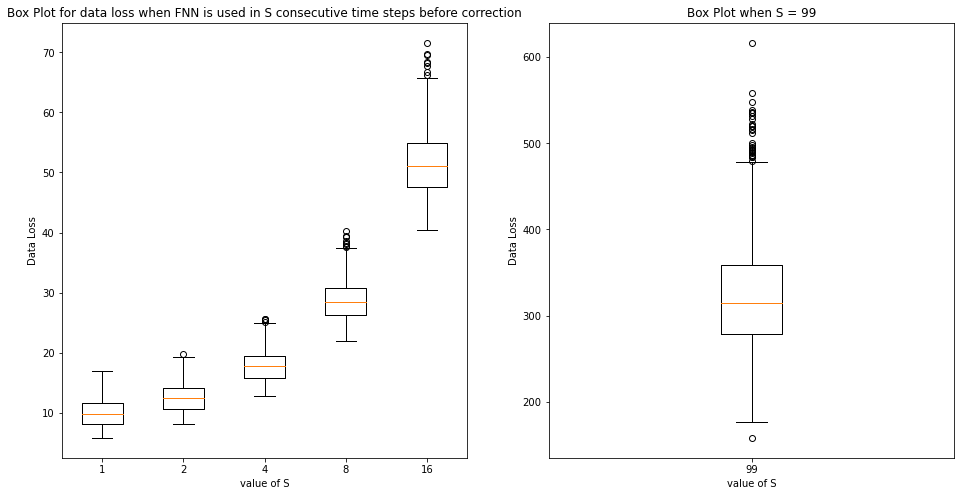

In [31]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
plt.title("Box Plot for data loss when FNN is used in S consecutive time steps before correction")
plt.ylabel("Data Loss")
plt.xlabel("value of S")
plt.boxplot(loss_lists.tolist()[:-1], labels = ["1","2","4","8","16"])

plt.subplot(1,2,2)
plt.title("Box Plot when S = 99")
plt.ylabel("Data Loss")
plt.xlabel("value of S")
plt.boxplot(loss_lists.tolist()[-1], labels = ["99"])
plt.show()

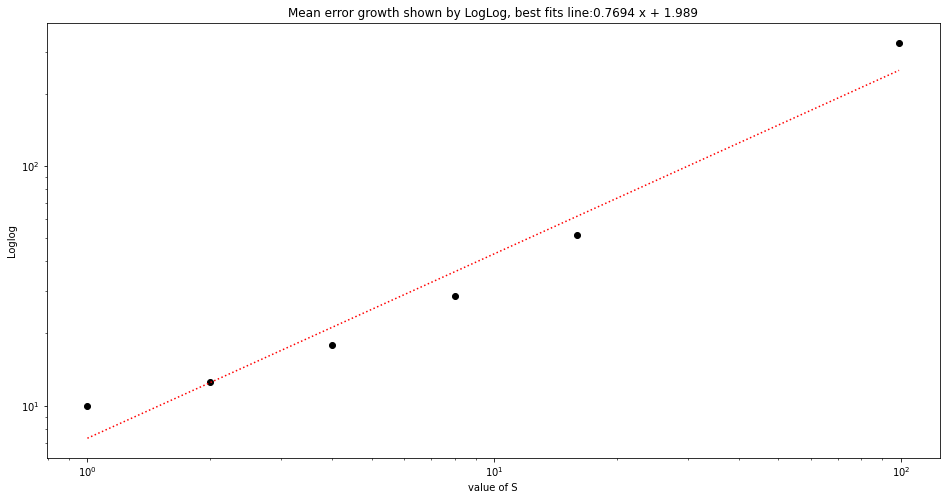

In [32]:
ave_error_list = [sum(e)/len(e) for e in loss_lists.tolist()]
time_steps = np.array([1.0, 2.0, 4.0, 8.0, 16.0, 99.0])

lx = np.log(time_steps)
ly = np.log(ave_error_list)

line = np.poly1d(np.polyfit(lx, ly, 1))

plt.figure(figsize=(16, 8))
plt.title('Mean error growth shown by LogLog, best fits line:' + str(line).strip())
plt.ylabel("Loglog")
plt.xlabel("value of S")
plt.loglog(time_steps, ave_error_list, 'ko')
plt.loglog(xx, yy, 'r:')
plt.show()

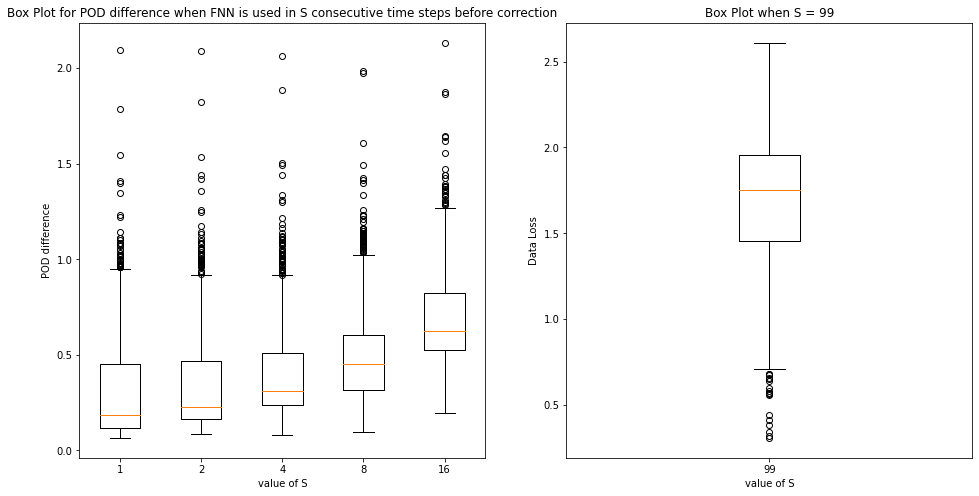

In [20]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
plt.title("Box Plot for POD difference when FNN is used in S consecutive time steps before correction")
plt.ylabel("POD difference")
plt.xlabel("value of S")
plt.boxplot(POD_lists.tolist()[:-1], labels = ["1","2","4","8","16"])

plt.subplot(1,2,2)
plt.title("Box Plot when S = 99")
plt.ylabel("Data Loss")
plt.xlabel("value of S")
plt.boxplot(POD_lists.tolist()[-1], labels = ["99"])
plt.show()

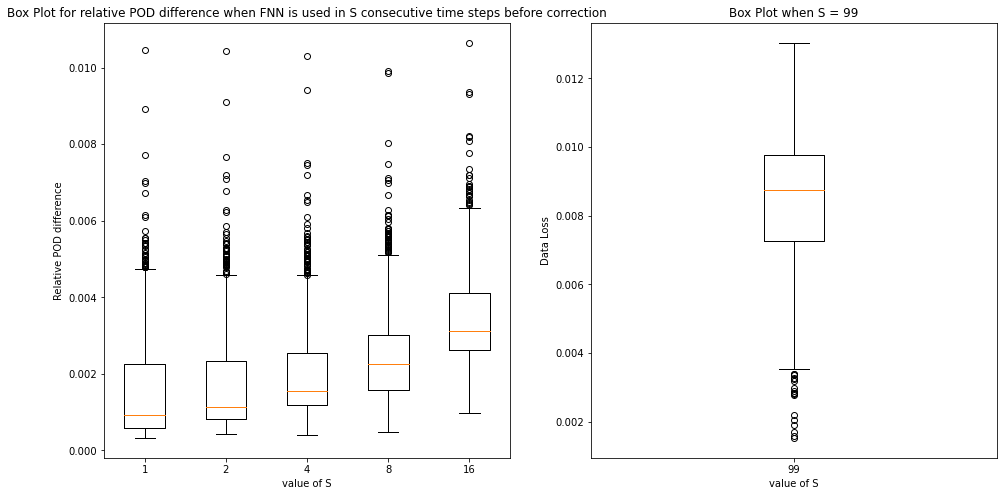

In [21]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
plt.title("Box Plot for relative POD difference when FNN is used in S consecutive time steps before correction")
plt.ylabel("Relative POD difference")
plt.xlabel("value of S")
plt.boxplot(POD_relative_lists.tolist()[:-1], labels = ["1","2","4","8","16"])

plt.subplot(1,2,2)
plt.title("Box Plot when S = 99")
plt.ylabel("Data Loss")
plt.xlabel("value of S")
plt.boxplot(POD_relative_lists.tolist()[-1], labels = ["99"])
plt.show()

In [29]:
# Visualize the further testing
prediction_lists = np.load("2D_FNN_results/larger_dataset(interpolated)/FNN_further_testing.npy")
actual_lists = np.load("2D_FNN_results/larger_dataset(interpolated)/FNN_further_testing_reference.npy")

In [31]:
# Display animations for temperature fields in different timestamps
fig = plt.figure(figsize=(12, 28))

plt.subplot(7,1,1)
plt.title("Actual Simulation")
plot1= plt.imshow(actual_lists[0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

plt.subplot(7,1,2)
plt.title("S = 1")
plot2= plt.imshow(prediction_lists[0][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(7,1,3)
plt.title("S = 2")
plot3= plt.imshow(prediction_lists[1][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(7,1,4)
plt.title("S = 4")
plot4= plt.imshow(prediction_lists[2][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

plt.subplot(7,1,5)
plt.title("S = 8")
plot5= plt.imshow(prediction_lists[3][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(7,1,6)
plt.title("S = 16")
plot6= plt.imshow(prediction_lists[4][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(7,1,7)
plt.title("S = 99")
plot7= plt.imshow(prediction_lists[5][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
def animate(i):
    plot1.set_data(actual_lists[i])
    plot2.set_data(prediction_lists[0][i])
    plot3.set_data(prediction_lists[1][i])
    plot4.set_data(prediction_lists[2][i])
    plot5.set_data(prediction_lists[3][i])
    plot6.set_data(prediction_lists[4][i])
    plot7.set_data(prediction_lists[5][i])
    return [plot1,plot2,plot3,plot4,plot5,plot6]

anim = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
anim.save('FNN_S_consecutive.gif')
plt.close()
HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.
